### 1. Import and data loading

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load clean dataset 
df = pd.read_csv("data/chess_games_clean.csv")
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,...,w_castles,w_promotions,b_captures,b_checks,b_castles,b_promotions,w_capture_rate,b_capture_rate,w_aggression_score,b_aggression_score
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,Time forfeit,...,1,0,4,0,1,0,0.160000,0.166667,0.160000,0.166667
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,...,1,0,7,2,1,0,0.222222,0.200000,0.500000,0.257143
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,Normal,...,1,0,4,0,1,0,0.133333,0.137931,0.133333,0.137931
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,...,1,0,9,3,0,0,0.277778,0.257143,0.305556,0.342857
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,Normal,...,1,0,6,0,1,0,0.178571,0.214286,0.285714,0.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267524,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,blitz,Normal,...,1,0,7,0,1,0,0.291667,0.304348,0.291667,0.304348
3267525,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,...,1,0,11,5,1,0,0.209677,0.180328,0.354839,0.262295
3267526,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,...,1,0,10,1,1,0,0.211538,0.192308,0.307692,0.211538
3267527,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,Normal,...,1,0,11,3,1,0,0.192308,0.215686,0.230769,0.274510


### 2. Variable encoding
Convert `Result` to numeric for machine learning

In [3]:
result_map = {
    '0-1': 0,
    '1/2-1/2': 1,
    '1-0': 2
}

df['ResultNumeric'] = df['Result'].map(result_map)

Also convert the `EventType` to numeric for machine learning

In [4]:
event_type_map = {
    'blitz': 0, 
    'rapid': 1, 
    'classical': 2
}
df['EventTypeID'] = df['EventType'].map(event_type_map)
df.head(10)

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,...,b_captures,b_checks,b_castles,b_promotions,w_capture_rate,b_capture_rate,w_aggression_score,b_aggression_score,ResultNumeric,EventTypeID
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,Time forfeit,...,4,0,1,0,0.160000,0.166667,0.160000,0.166667,2,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,...,7,2,1,0,0.222222,0.200000,0.500000,0.257143,1,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,Normal,...,4,0,1,0,0.133333,0.137931,0.133333,0.137931,1,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,...,9,3,0,0,0.277778,0.257143,0.305556,0.342857,2,0
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,Normal,...,6,0,1,0,0.178571,0.214286,0.285714,0.214286,0,0
5,Rated Blitz game,2024.01.01,falerito,estaka1,0-1,A08,2404,2534,blitz,Time forfeit,...,8,4,1,0,0.183673,0.163265,0.204082,0.244898,0,0
6,Rated Blitz game,2024.01.01,TorBot_SL,ToromBot,1/2-1/2,E61,2860,2922,blitz,Normal,...,2,0,1,0,0.064516,0.066667,0.064516,0.066667,1,0
7,Rated Blitz game,2024.01.01,CPU2006,Phalanx-XXV,1-0,D46,2752,2395,blitz,Normal,...,14,9,1,0,0.192308,0.181818,0.256410,0.298701,2,0
8,Rated Blitz game,2024.01.01,MadderRose,Philidor23,1-0,B38,2538,2430,blitz,Normal,...,9,0,1,0,0.323529,0.272727,0.470588,0.272727,2,0
9,Rated Blitz game,2024.01.01,MassterofMayhem,Pliukha_Mikhail,1-0,B01,2604,2727,blitz,Normal,...,4,1,0,0,0.294118,0.250000,0.352941,0.312500,2,0


### 2.5 Exploratory data analysis (EDA)

In [5]:
print(f"Total games: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique players (White): {df['White'].nunique():,}")
print(f"Unique players (Black): {df['Black'].nunique():,}")
print(f"Unique ECO codes: {df['ECO'].nunique()}")

Total games: 3,267,529
Total features: 27

Date range: 2024.01.01 to 2024.12.31
Unique players (White): 52,119
Unique players (Black): 51,985
Unique ECO codes: 496


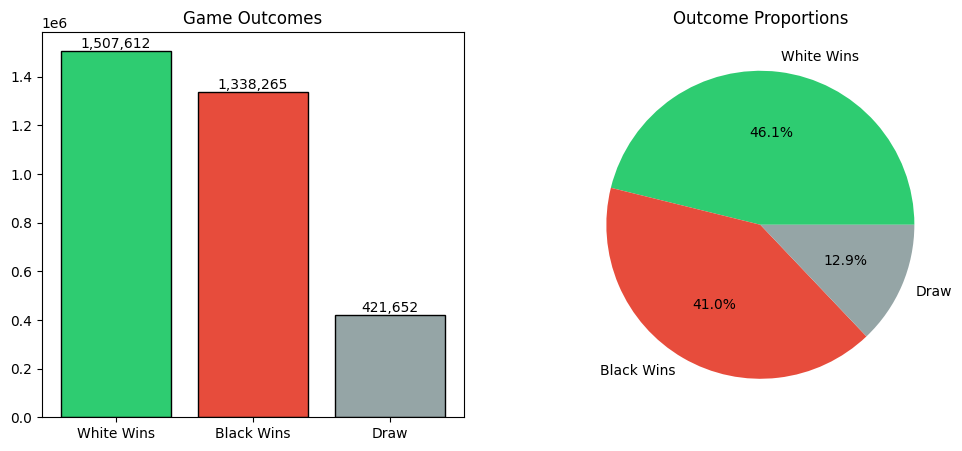

In [6]:
# Count results
counts = df['Result'].value_counts()
labels = ['White Wins', 'Black Wins', 'Draw']
colors = ['#2ecc71', '#e74c3c', '#95a5a6']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart 
axes[0].bar(labels, counts.values, color=colors, edgecolor='black')
axes[0].set_title('Game Outcomes')
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pie chart 
axes[1].pie(counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Outcome Proportions')

plt.show()


#### Event type

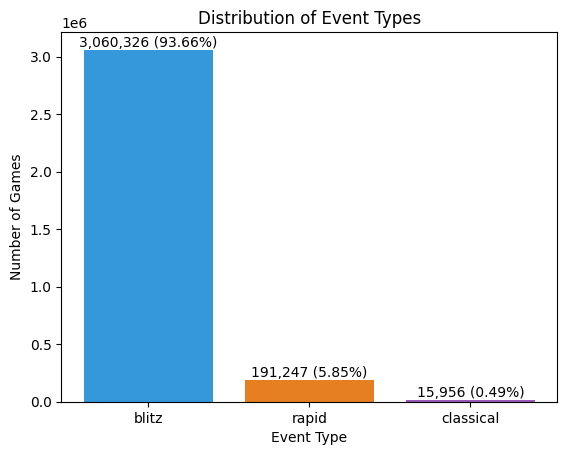

In [7]:
event_counts = df['EventType'].value_counts()
event_pcts = df['EventType'].value_counts(normalize=True) * 100

# Visualization
bars = plt.bar(event_counts.index, event_counts.values,
               color=['#3498db', '#e67e22', '#9b59b6'])

plt.xlabel('Event Type')
plt.ylabel('Number of Games')
plt.title('Distribution of Event Types')

# Add number above each bar
for bar in bars:
    event = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    pct = (height / event_counts.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,} ({pct:.2f}%)",
        ha="center", va="bottom"
    )

plt.show()


#### Elo rating 

/tmp/ipykernel_250598/2427650108.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(['White Elo', 'Black Elo'])


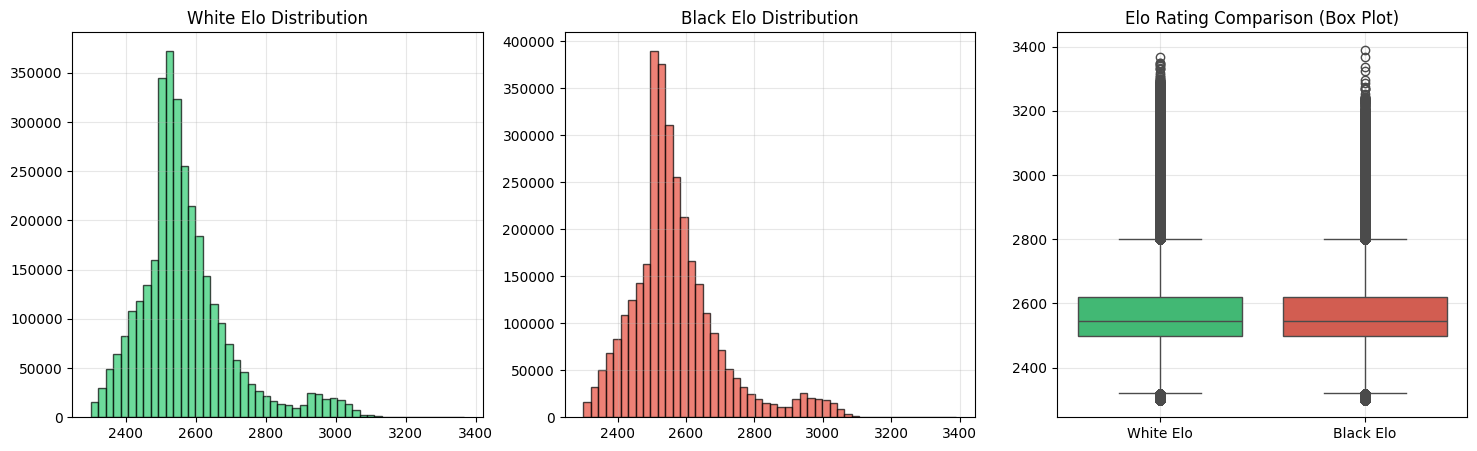

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for White Elo
axes[0].hist(df['WhiteElo'], bins=50, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[0].set_title('White Elo Distribution')
axes[0].grid(alpha=0.3)

# Histogram for Black Elo
axes[1].hist(df['BlackElo'], bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[1].set_title('Black Elo Distribution')
axes[1].grid(alpha=0.3)

# Boxplot comparison
sns.boxplot(data=[df['WhiteElo'], df['BlackElo']],
            palette=['#2ecc71', '#e74c3c'],
            ax=axes[2])
axes[2].set_xticklabels(['White Elo', 'Black Elo'])
axes[2].set_title('Elo Rating Comparison (Box Plot)')
axes[2].grid(alpha=0.3)

plt.show()


#### ECO / Opening


Top 20 Most Common Openings:
   1. A45: 80,658 (2.47%)
   2. A00: 78,140 (2.39%)
   3. D02: 69,130 (2.12%)
   4. B00: 66,823 (2.05%)
   5. B12: 64,920 (1.99%)
   6. A05: 64,559 (1.98%)
   7. A40: 63,309 (1.94%)
   8. A04: 60,707 (1.86%)
   9. B06: 58,826 (1.80%)
  10. B40: 57,653 (1.76%)
  11. B01: 53,818 (1.65%)
  12. A01: 50,160 (1.54%)
  13. D00: 48,325 (1.48%)
  14. A46: 47,909 (1.47%)
  15. C00: 47,808 (1.46%)
  16. B10: 46,737 (1.43%)
  17. B23: 45,165 (1.38%)
  18. B90: 42,923 (1.31%)
  19. B22: 42,108 (1.29%)
  20. B30: 40,051 (1.23%)

Top 20 ECO codes coverage: 34.57% of all games


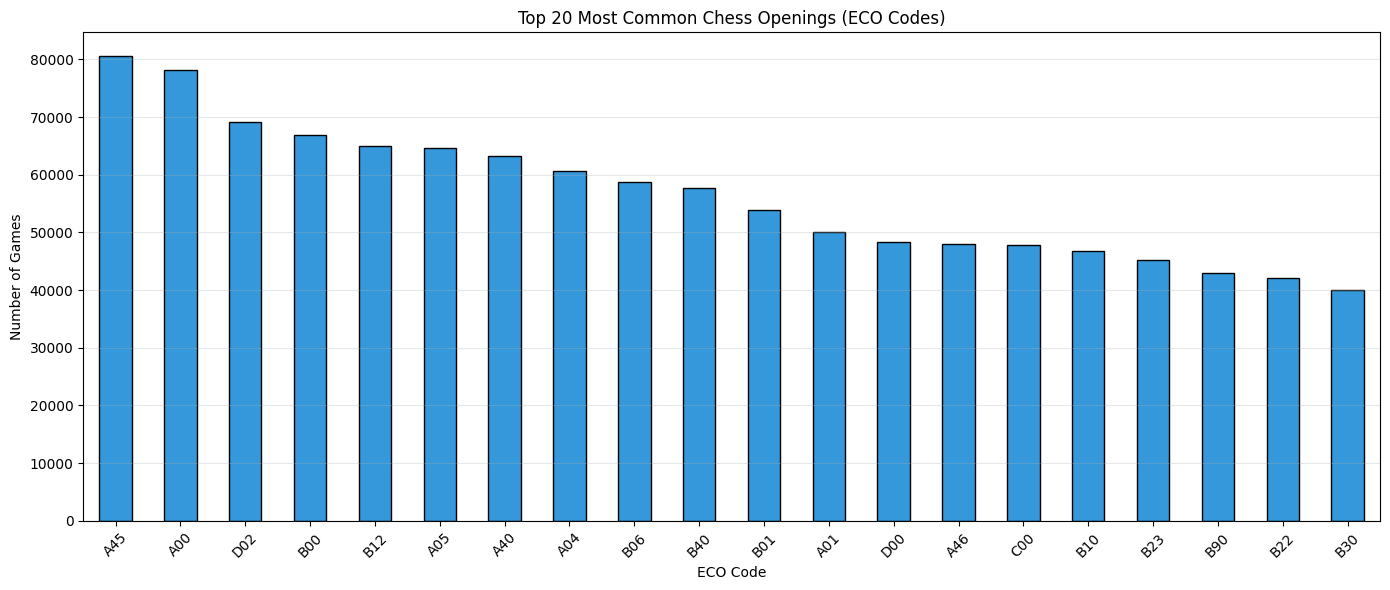

In [9]:
print(f"\nTop 20 Most Common Openings:")
top_20_display = df['ECO'].value_counts().head(20)
for i, (eco, count) in enumerate(top_20_display.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {eco}: {count:,} ({pct:.2f}%)")

# Coverage analysis
top_20_coverage = top_20_display.sum() / len(df) * 100
print(f"\nTop 20 ECO codes coverage: {top_20_coverage:.2f}% of all games")

# Visualization
plt.figure(figsize=(14, 6))
top_20_display.plot(kind='bar', color='#3498db', edgecolor='black')
plt.xlabel('ECO Code')
plt.ylabel('Number of Games')
plt.title('Top 20 Most Common Chess Openings (ECO Codes)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


#### Initial correlation

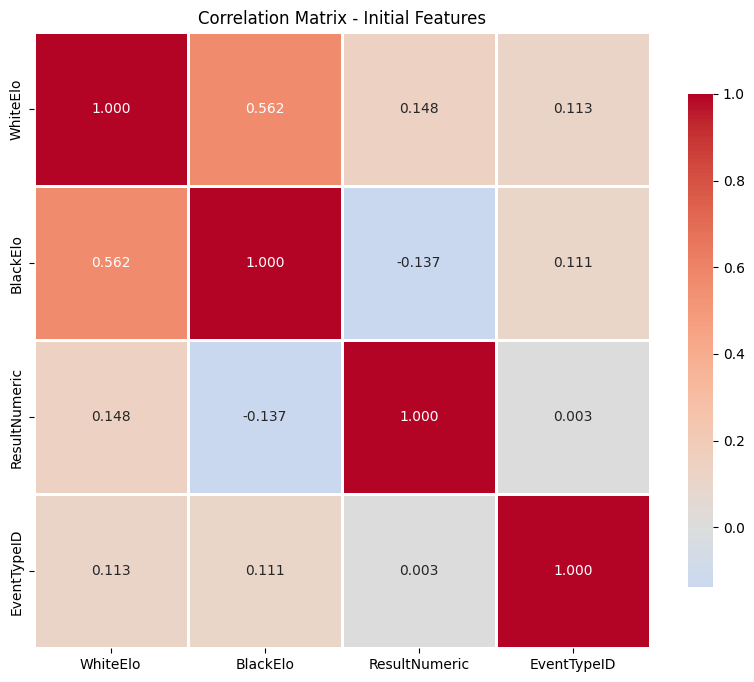

In [10]:
numeric_cols = ['WhiteElo', 'BlackElo', 'ResultNumeric', 'EventTypeID']
corr_matrix = df[numeric_cols].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Initial Features')

plt.show()

#### Result by event type

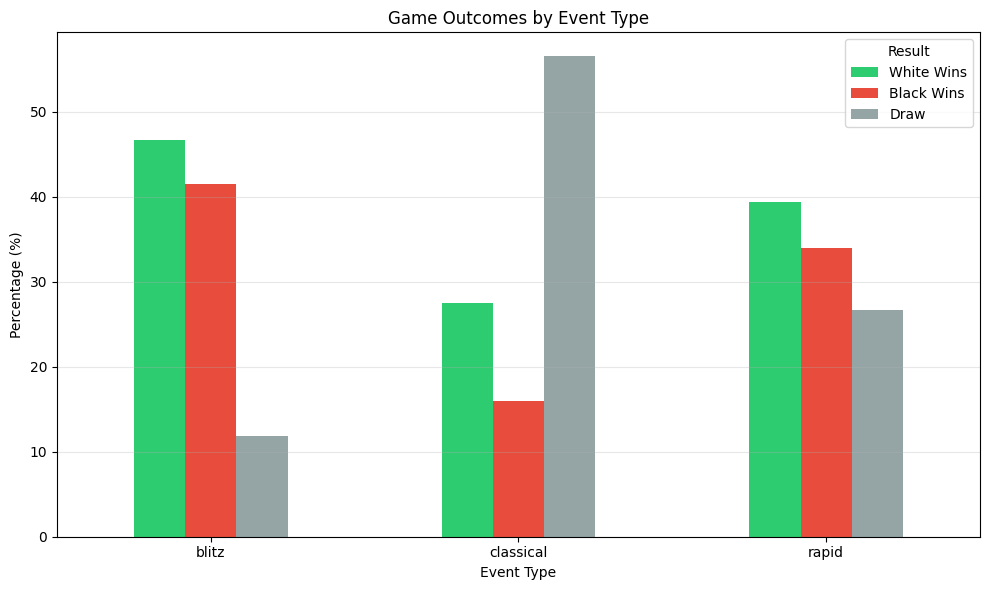

In [11]:
result_by_event = pd.crosstab(df['EventType'], df['Result'], normalize='index') * 100
result_by_event = result_by_event[['1-0', '0-1', '1/2-1/2']]
result_by_event.columns = ['White Wins', 'Black Wins', 'Draw']

# Visualization
result_by_event.plot(kind='bar', stacked=False, figsize=(10, 6),
                     color=['#2ecc71', '#e74c3c', '#95a5a6'])

plt.xlabel('Event Type')
plt.ylabel('Percentage (%)')
plt.title('Game Outcomes by Event Type')
plt.legend(title='Result', labels=['White Wins', 'Black Wins', 'Draw'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### 3. Basic feature engineering
create new numeric features for machine learning 

In [12]:
# Rating difference
df['RatingDiff'] = np.abs(df['WhiteElo'] - df['BlackElo'])

# Average rating
df['AvgRating'] = (df['WhiteElo'] + df['BlackElo']) / 2

# Indicator if White is higher rated (binary)
df['WhiteIsHigherRated'] = (df['WhiteElo'] > df['BlackElo']).astype(int)

# Rating advantage (signed - keeps direction)
df['WhiteRatingAdvantage'] = df['WhiteElo'] - df['BlackElo']
df

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,...,w_capture_rate,b_capture_rate,w_aggression_score,b_aggression_score,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,Time forfeit,...,0.160000,0.166667,0.160000,0.166667,2,0,133,2437.5,1,133
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,...,0.222222,0.200000,0.500000,0.257143,1,0,109,2541.5,0,-109
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,Normal,...,0.133333,0.137931,0.133333,0.137931,1,0,6,2918.0,0,-6
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,...,0.277778,0.257143,0.305556,0.342857,2,0,109,2487.5,1,109
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,Normal,...,0.178571,0.214286,0.285714,0.214286,0,0,185,2565.5,0,-185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267524,Rated Blitz game,2024.12.31,AfricanJo,Yuri_Guenther,1/2-1/2,C47,2665,2655,blitz,Normal,...,0.291667,0.304348,0.291667,0.304348,1,0,10,2660.0,1,10
3267525,Rated Blitz game,2024.12.31,cad2024,emiliofelixramirez,1-0,D23,2537,2449,blitz,Time forfeit,...,0.209677,0.180328,0.354839,0.262295,2,0,88,2493.0,1,88
3267526,Rated Blitz game,2024.12.31,learningchessreally,BiletskiyDanylo,0-1,A15,2583,2557,blitz,Time forfeit,...,0.211538,0.192308,0.307692,0.211538,0,0,26,2570.0,1,26
3267527,Rated Blitz game,2024.12.31,lotrisking,ezis71,1-0,D30,2513,2398,blitz,Normal,...,0.192308,0.215686,0.230769,0.274510,2,0,115,2455.5,1,115


### 4. Opening encoding (ECO)
Since there is almost 500 different ECO, we decide to just use the top 20 most use while the rest will be others.

In [13]:
# Get top 20 ECO codes
top_20_eco = df['ECO'].value_counts().head(20).index.tolist()

# Group less frequent ECO codes into 'Other'
def group_eco(code):
    if code in top_20_eco:
        return code
    return 'Other'

df['ECOGroup'] = df['ECO'].apply(group_eco)
eco_categories = ['Other'] + top_20_eco
df['ECOID'] = df['ECOGroup'].apply(lambda x: eco_categories.index(x))
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,EventType,Termination,...,w_aggression_score,b_aggression_score,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOGroup,ECOID
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,blitz,Time forfeit,...,0.160000,0.166667,2,0,133,2437.5,1,133,Other,0
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,blitz,Normal,...,0.500000,0.257143,1,0,109,2541.5,0,-109,Other,0
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,blitz,Normal,...,0.133333,0.137931,1,0,6,2918.0,0,-6,Other,0
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,blitz,Normal,...,0.305556,0.342857,2,0,109,2487.5,1,109,B40,10
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,blitz,Normal,...,0.285714,0.214286,0,0,185,2565.5,0,-185,Other,0


### 5. Termination encoding

In [14]:
term_map = {'normal': 0, 'time': 1}
df['TerminationID'] = df['TerminationType'].map(term_map)

### 6. Additional features

In [15]:
df['total_captures'] = df['w_captures'] + df['b_captures']
df['capture_diff'] = df['w_captures'] - df['b_captures']
df['capture_diff_abs'] = np.abs(df['capture_diff'])

df['total_checks'] = df['w_checks'] + df['b_checks']
df['check_diff'] = df['w_checks'] - df['b_checks']

df['total_promotions'] = df['w_promotions'] + df['b_promotions']
df['promotion_diff'] = df['w_promotions'] - df['b_promotions']

df['aggression_diff'] = df['w_aggression_score'] - df['b_aggression_score']

# Both sides castled (indicates normal development)
df['both_castled'] = ((df['w_castles'] > 0) & (df['b_castles'] > 0)).astype(int)

# Game length categories
df['game_length_short'] = (df['total_moves'] < 30).astype(int)
df['game_length_medium'] = ((df['total_moves'] >= 30) & (df['total_moves'] < 60)).astype(int)
df['game_length_long'] = (df['total_moves'] >= 60).astype(int)

# Tactical intensity
df['tactical_intensity'] = (df['total_captures'] + df['total_checks']) / df['total_moves']

# White played more aggressively
df['white_more_aggressive'] = (df['w_aggression_score'] > df['b_aggression_score']).astype(int)

### 7. Correlation Matrix with all features

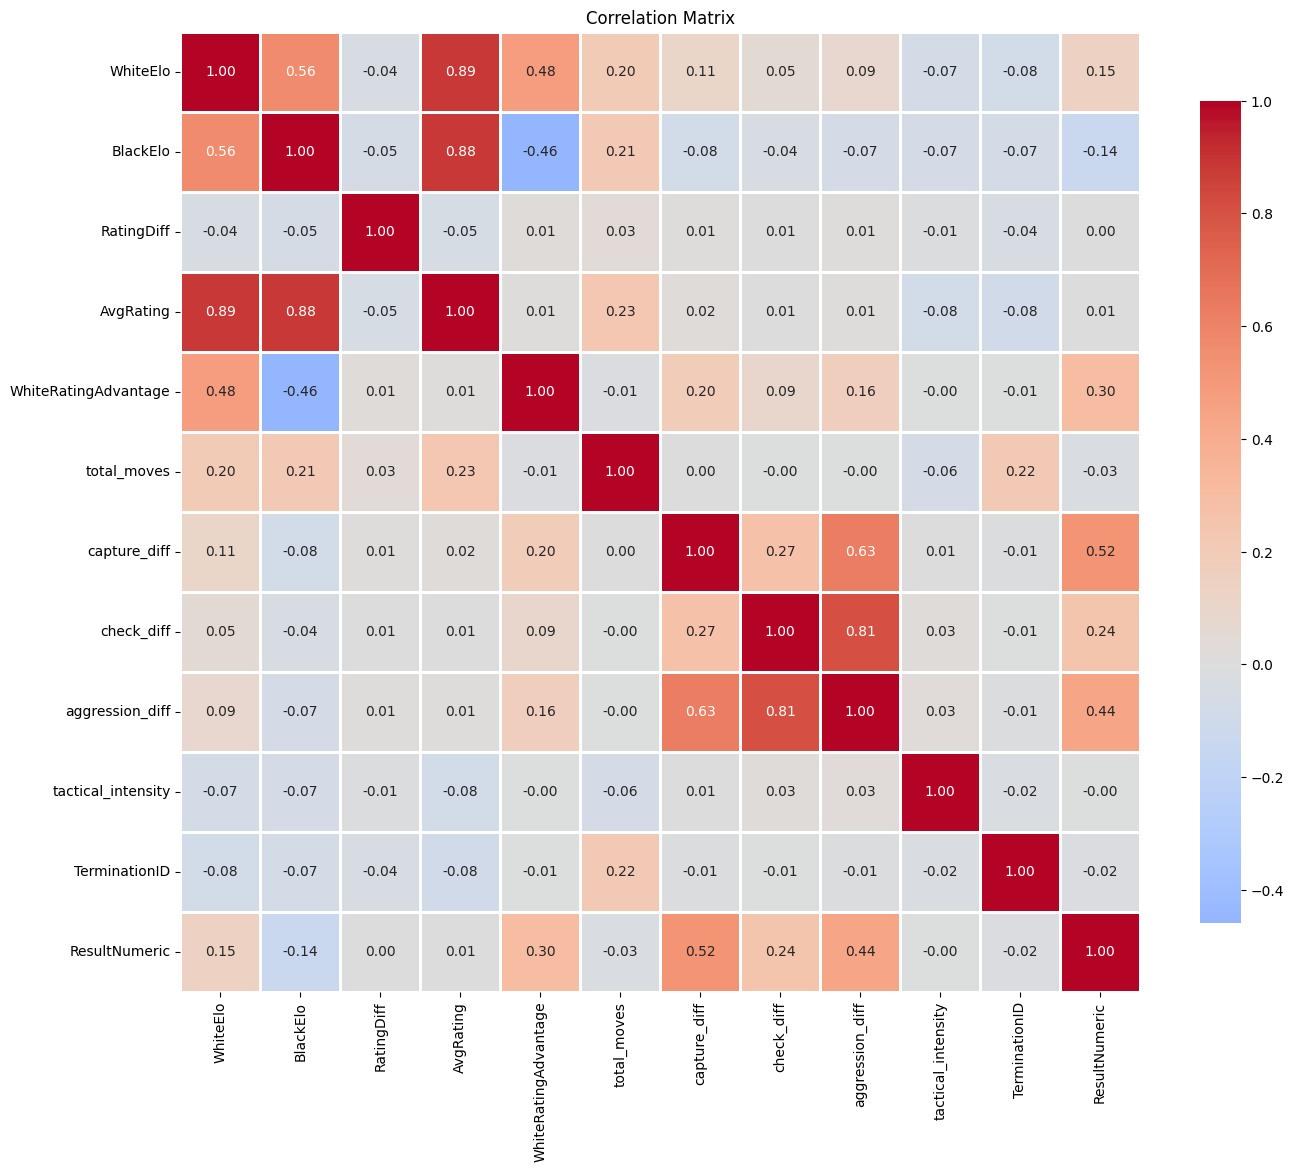

In [16]:
final_numeric = ['WhiteElo', 'BlackElo', 'RatingDiff', 'AvgRating', 'WhiteRatingAdvantage',
                 'total_moves', 'capture_diff', 'check_diff', 'aggression_diff', 
                 'tactical_intensity', 'TerminationID', 'ResultNumeric']

final_corr = df[final_numeric].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(final_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### 8. Remove unneeded columns

In [17]:
# 'Event', 'EventType', 'Result','ECO' and 'ECOGroup' can be drop because there is 'EventTypeID', 'ECOID', 'ResultNumeric'
# 'Date' is not used for the data since it is just data about time 
# Same with 'White' and 'Black', these are just the username so the data is not used
df = df.drop(['Event', 'Date', 'White', 'Black', 'Result', 'ECO', 
            'ECOGroup', 'EventType', 'Termination', 'TerminationType', 'Moves'], axis=1)

### 9. Exported featured data
Final check before export into csv

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3267529 entries, 0 to 3267528
Data columns (total 37 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   WhiteElo               int64  
 1   BlackElo               int64  
 2   total_moves            int64  
 3   w_captures             int64  
 4   w_checks               int64  
 5   w_castles              int64  
 6   w_promotions           int64  
 7   b_captures             int64  
 8   b_checks               int64  
 9   b_castles              int64  
 10  b_promotions           int64  
 11  w_capture_rate         float64
 12  b_capture_rate         float64
 13  w_aggression_score     float64
 14  b_aggression_score     float64
 15  ResultNumeric          int64  
 16  EventTypeID            int64  
 17  RatingDiff             int64  
 18  AvgRating              float64
 19  WhiteIsHigherRated     int64  
 20  WhiteRatingAdvantage   int64  
 21  ECOID                  int64  
 22  TerminationID     

In [19]:
df.isnull().sum()

WhiteElo                 0
BlackElo                 0
total_moves              0
w_captures               0
w_checks                 0
w_castles                0
w_promotions             0
b_captures               0
b_checks                 0
b_castles                0
b_promotions             0
w_capture_rate           0
b_capture_rate           0
w_aggression_score       0
b_aggression_score       0
ResultNumeric            0
EventTypeID              0
RatingDiff               0
AvgRating                0
WhiteIsHigherRated       0
WhiteRatingAdvantage     0
ECOID                    0
TerminationID            0
total_captures           0
capture_diff             0
capture_diff_abs         0
total_checks             0
check_diff               0
total_promotions         0
promotion_diff           0
aggression_diff          0
both_castled             0
game_length_short        0
game_length_medium       0
game_length_long         0
tactical_intensity       0
white_more_aggressive    0
d

In [20]:
df.to_csv('data/chess_games_feature.csv', index=False)